In [1]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
df_all = pd.read_csv('/content/drive/MyDrive/DA ASSIGNMENT/DATA/divvy_171819.csv',parse_dates=['start_time', 'end_time'])

<ipython-input-3-4be18535920a>:1: DtypeWarning: Columns (4,6,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('/content/drive/MyDrive/DA ASSIGNMENT/DATA/divvy_171819.csv',parse_dates=['start_time', 'end_time'])


In [4]:
station_data=pd.read_csv("/content/drive/MyDrive/PROGRAMMING IN BA ASSIGNMENT/Divvy_Stations_2017_Q1Q2.csv")
station_data.head()

,id,name,city,latitude,longitude,dpcapacity,online_date
0,456,2112 W Peterson Ave,Chicago,41.991178,-87.683593,15,2/10/2015 14:04:42
1,101,63rd St Beach,Chicago,41.781016,-87.576120,23,7/16/2013 01:27:50
2,109,900 W Harrison St,Chicago,41.874675,-87.650019,19,7/18/2013 16:45:02
3,21,Aberdeen St & Jackson Blvd,Chicago,41.877726,-87.654787,15,6/22/2013 19:07:12
4,80,Aberdeen St & Madison (Monroe) St,Chicago,41.881567,-87.655056,19,6/26/2013 19:00:18


In [5]:
statons = station_data['name']
latitude = station_data['latitude']
longitude = station_data['longitude']

In [6]:
station_gps = pd.DataFrame({'station_name': statons, 'latitude': latitude, 'longitude': longitude})
station_gps

,station_name,latitude,longitude
0,2112 W Peterson Ave,41.991178,-87.683593
1,63rd St Beach,41.781016,-87.576120
2,900 W Harrison St,41.874675,-87.650019
3,Aberdeen St & Jackson Blvd,41.877726,-87.654787
4,Aberdeen St & Madison (Monroe) St,41.881567,-87.655056
...,...,...,...
577,Marion St & South Blvd,41.886810,-87.802870
578,Oak Park Ave & Harrison St,41.872987,-87.793945
579,Oak Park Ave & South Blvd,41.886923,-87.793899
580,Ridgeland Ave & Lake St,41.888085,-87.785236


In [7]:
df_all = df_all.merge(station_gps, how='left', left_on=['from_station_name'], right_on=['station_name'])
df_all = df_all.rename(index=str, columns={"latitude": "from_station_latitude", "longitude": "from_station_longitude"})

df_all = df_all.merge(station_gps, how='left', left_on=['to_station_name'], right_on=['station_name'])
df_all = df_all.rename(index=str, columns={"latitude": "to_station_latitude", "longitude": "to_station_longitude"})


In [8]:
df_all.to_csv('/content/drive/MyDrive/DA ASSIGNMENT/DATA/divvy_final.csv', index=False)
df_all = pd.read_csv('/content/drive/MyDrive/DA ASSIGNMENT/DATA/divvy_final.csv',parse_dates=['start_time', 'end_time'])

<ipython-input-8-594cb776a8e6>:2: DtypeWarning: Columns (4,6,8,9,10,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('/content/drive/MyDrive/DA ASSIGNMENT/DATA/divvy_final.csv',parse_dates=['start_time', 'end_time'])


In [9]:
df_all.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,Quarter,station_name_x,from_station_latitude,from_station_longitude,station_name_y,to_station_latitude,to_station_longitude
0,13518905.0,2017-03-31 23:59:07,2017-04-01 00:13:24,5292.0,857,66.0,Clinton St & Lake St,171.0,May St & Cullerton St,Subscriber,Male,1989.0,Q1,Clinton St & Lake St,41.885637,-87.641823,May St & Cullerton St,41.855136,-87.654127
1,13518904.0,2017-03-31 23:56:25,2017-04-01 00:00:21,4408.0,236,199.0,Wabash Ave & Grand Ave,26.0,McClurg Ct & Illinois St,Subscriber,Male,1990.0,Q1,Wabash Ave & Grand Ave,41.890912,-87.626804,McClurg Ct & Illinois St,41.891020,-87.617300
2,13518903.0,2017-03-31 23:55:33,2017-04-01 00:01:21,696.0,348,520.0,Greenview Ave & Jarvis Ave,432.0,Clark St & Lunt Ave,Subscriber,Female,1979.0,Q1,Greenview Ave & Jarvis Ave,42.015962,-87.668570,Clark St & Lunt Ave,42.009074,-87.674190
3,13518902.0,2017-03-31 23:54:46,2017-03-31 23:59:34,4915.0,288,110.0,Dearborn St & Erie St,142.0,McClurg Ct & Erie St,Subscriber,Male,1985.0,Q1,Dearborn St & Erie St,41.893992,-87.629318,McClurg Ct & Erie St,41.894503,-87.617854
4,13518901.0,2017-03-31 23:53:33,2017-04-01 00:00:28,4247.0,415,327.0,Sheffield Ave & Webster Ave,331.0,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,Q1,Sheffield Ave & Webster Ave,41.921540,-87.653818,Halsted St & Blackhawk St (*),41.908537,-87.648627


In [10]:
df_all=df_all.drop(['station_name_x','station_name_y'], axis=1)

In [11]:
df_all.dtypes

trip_id                          float64
start_time                datetime64[ns]
end_time                  datetime64[ns]
bikeid                           float64
tripduration                      object
from_station_id                  float64
from_station_name                 object
to_station_id                    float64
to_station_name                   object
usertype                          object
gender                            object
birthyear                        float64
Quarter                           object
from_station_latitude            float64
from_station_longitude           float64
to_station_latitude              float64
to_station_longitude             float64
dtype: object

In [12]:
df_all.shape

(11250100, 17)

SEASON MONTH AND DAY-WISE ANALYSIS

In [13]:
df_all['startdate_time'] = pd.to_datetime(df_all['start_time'], errors='coerce')

In [14]:
df_all['dayoftheWeek'] = df_all['startdate_time'].dt.day_name()
df_all['Month'] = df_all['startdate_time'].dt.month_name()
df_all['Year'] = df_all['startdate_time'].dt.year
df_all['StartingTime']=df_all['startdate_time'].dt.time

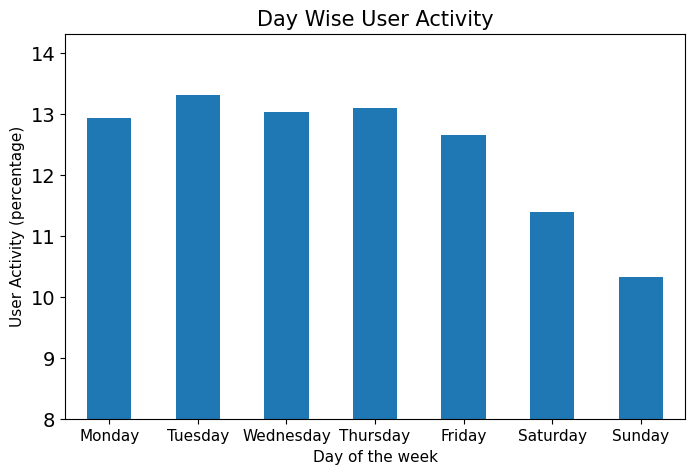

In [15]:
df_all['dayoftheWeek'] = pd.Categorical(df_all['dayoftheWeek'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],ordered=True)

week1=(df_all['dayoftheWeek'].value_counts()*100)/len(df_all)
week2 = week1.sort_index()

from pylab import *
plt.figure(figsize=(8,5))
week2.plot(kind='bar')

plt.ylim(8,max(week2)+1)
plt.xticks(rotation=0,fontsize=11)
plt.yticks(fontsize=14)
plt.title("Day Wise User Activity",fontsize=15)
plt.xlabel("Day of the week",fontsize=11)
plt.ylabel("User Activity (percentage)",fontsize=11)
import matplotlib
matplotlib.rcParams['axes.linewidth'] = 0.5

In [16]:
df_all["Month"].unique()

array(['March', 'February', 'January', 'June', 'May', 'April',
       'September', 'August', 'July', 'December', 'November', 'October',
       nan], dtype=object)

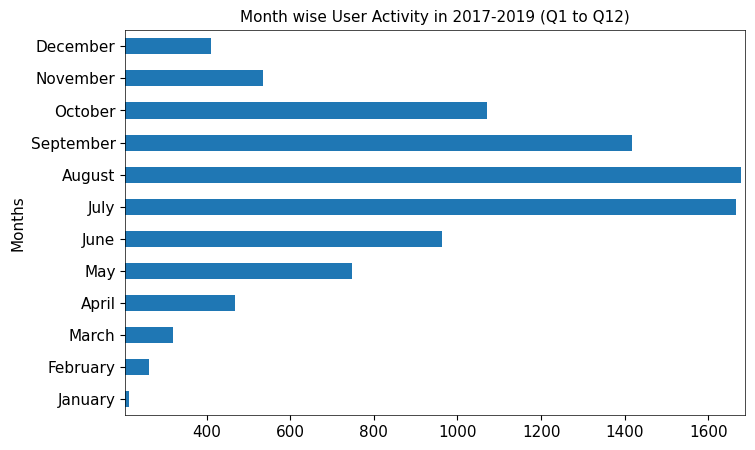

In [17]:
df_all['Month'] = pd.Categorical(df_all['Month'], categories= ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'],ordered=True)
month=df_all['Month'].value_counts()/1000
month = month.sort_index()
from pylab import *
plt.figure(figsize=(8,5))
plt.xlim(min(month)-10,max(month)+10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title("Month wise User Activity in 2017-2019 (Q1 to Q12)",fontsize=11)
plt.xlabel("Count User Activity in (thousands)",fontsize=11)
plt.ylabel("Months",fontsize=11)
month.plot(kind='barh')
import matplotlib
matplotlib.rcParams['axes.linewidth'] = 0.5

In [18]:
df_all['Quarter'] = pd.Categorical(df_all['Quarter'], categories=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12'],ordered=True)
Q=(df_all['Quarter'].value_counts()*100)/len(df_all)
print(Q)

Q11    14.584030
Q3     14.295606
Q7     13.453836
Q2      9.953814
Q10     9.850250
Q6      9.419303
Q12     6.258202
Q4      5.948738
Q8      5.712714
Q1      3.837219
Q5      3.441258
Q9      3.245029
Name: Quarter, dtype: float64


Text(0, 0.5, 'Count User Activity (percentage)')

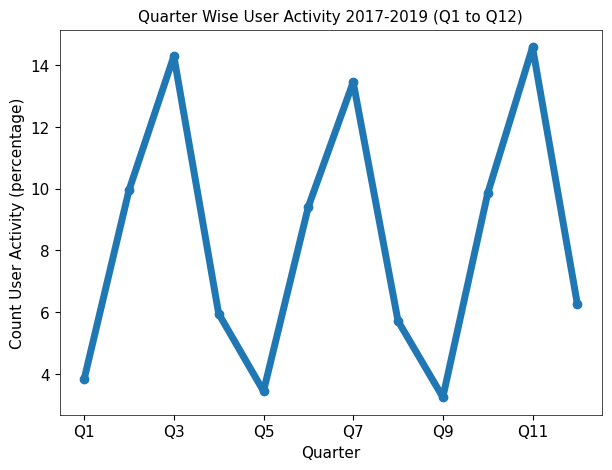

In [19]:
Q = Q.sort_index()
plt.figure(figsize=(7,5))
Q.plot(kind='line',marker='o',linewidth=5.0,linestyle='-')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title("Quarter Wise User Activity 2017-2019 (Q1 to Q12)",fontsize=11)
plt.xlabel("Quarter",fontsize=11)
plt.ylabel("Count User Activity (percentage)",fontsize=11)

In [20]:
df_all.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,...,Quarter,from_station_latitude,from_station_longitude,to_station_latitude,to_station_longitude,startdate_time,dayoftheWeek,Month,Year,StartingTime
0,13518905.0,2017-03-31 23:59:07,2017-04-01 00:13:24,5292.0,857,66.0,Clinton St & Lake St,171.0,May St & Cullerton St,Subscriber,...,Q1,41.885637,-87.641823,41.855136,-87.654127,2017-03-31 23:59:07,Friday,March,2017.0,23:59:07
1,13518904.0,2017-03-31 23:56:25,2017-04-01 00:00:21,4408.0,236,199.0,Wabash Ave & Grand Ave,26.0,McClurg Ct & Illinois St,Subscriber,...,Q1,41.890912,-87.626804,41.891020,-87.617300,2017-03-31 23:56:25,Friday,March,2017.0,23:56:25
2,13518903.0,2017-03-31 23:55:33,2017-04-01 00:01:21,696.0,348,520.0,Greenview Ave & Jarvis Ave,432.0,Clark St & Lunt Ave,Subscriber,...,Q1,42.015962,-87.668570,42.009074,-87.674190,2017-03-31 23:55:33,Friday,March,2017.0,23:55:33
3,13518902.0,2017-03-31 23:54:46,2017-03-31 23:59:34,4915.0,288,110.0,Dearborn St & Erie St,142.0,McClurg Ct & Erie St,Subscriber,...,Q1,41.893992,-87.629318,41.894503,-87.617854,2017-03-31 23:54:46,Friday,March,2017.0,23:54:46
4,13518901.0,2017-03-31 23:53:33,2017-04-01 00:00:28,4247.0,415,327.0,Sheffield Ave & Webster Ave,331.0,Halsted St & Blackhawk St (*),Subscriber,...,Q1,41.921540,-87.653818,41.908537,-87.648627,2017-03-31 23:53:33,Friday,March,2017.0,23:53:33


In [21]:
df_all.dtypes

trip_id                          float64
start_time                datetime64[ns]
end_time                  datetime64[ns]
bikeid                           float64
tripduration                      object
from_station_id                  float64
from_station_name                 object
to_station_id                    float64
to_station_name                   object
usertype                          object
gender                            object
birthyear                        float64
Quarter                         category
from_station_latitude            float64
from_station_longitude           float64
to_station_latitude              float64
to_station_longitude             float64
startdate_time            datetime64[ns]
dayoftheWeek                    category
Month                           category
Year                             float64
StartingTime                      object
dtype: object

In [22]:
def identify_season(Month):
    season = None
    if Month == 'January' or Month == 'February' or Month == 'December':
        season = 'Winter'
    elif Month == 'March' or Month == 'April' or Month == 'May':
        season = 'Spring'
    elif Month == 'June' or Month == 'July' or Month == 'August':
        season = 'Summer'
    elif Month == 'September' or Month == 'October' or Month == 'November':
        season = 'Autumn'
    return season


In [23]:
season_list = []
for Month in df_all['Month']:
  season_list.append(identify_season(Month))
df_all['season'] = season_list

In [24]:
df_all['season'].unique()

array(['Spring', 'Winter', 'Summer', 'Autumn', None], dtype=object)

In [25]:
Season_wise_Sale=(df_all['season'].value_counts()*100)/len(df_all)
print(Season_wise_Sale)

Summer    38.304735
Autumn    26.873886
Spring    13.643692
Winter     7.886179
Name: season, dtype: float64


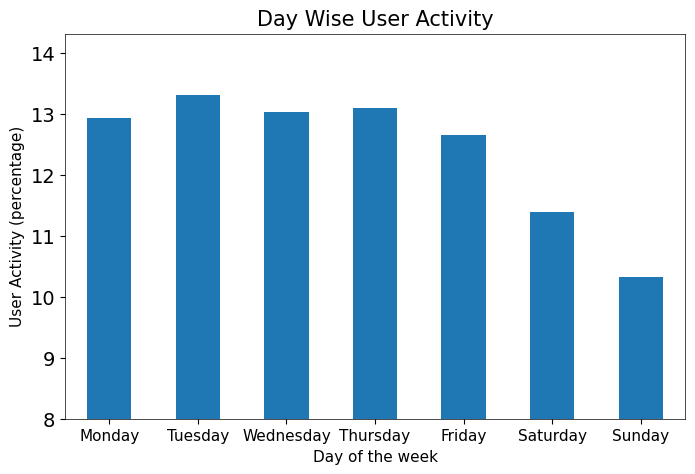

In [26]:
import pandas as pd
df_all['dayoftheWeek'] = pd.Categorical(df_all['dayoftheWeek'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],ordered=True)

week1=(df_all['dayoftheWeek'].value_counts()*100)/len(df_all)
week2 = week1.sort_index()

from pylab import *
plt.figure(figsize=(8,5))
week2.plot(kind='bar')

plt.ylim(8,max(week2)+1)
plt.xticks(rotation=0,fontsize=11)
plt.yticks(fontsize=14)
plt.title("Day Wise User Activity",fontsize=15)
plt.xlabel("Day of the week",fontsize=11)
plt.ylabel("User Activity (percentage)",fontsize=11)
import matplotlib
matplotlib.rcParams['axes.linewidth'] = 0.5

In [27]:
df_all.describe()

,trip_id,bikeid,from_station_id,to_station_id,birthyear,from_station_latitude,from_station_longitude,to_station_latitude,to_station_longitude,Year
count,9.754792e+06,9.754792e+06,9.754792e+06,9.754792e+06,8.027349e+06,9.301311e+06,9.301311e+06,9.300519e+06,9.300519e+06,9.754792e+06
mean,1.931337e+07,3.422122e+03,1.896552e+02,1.902392e+02,1.982793e+03,4.189913e+01,-8.764181e+01,4.189971e+01,-8.764209e+01,2.017885e+03
std,3.873603e+06,1.894820e+03,1.427495e+02,1.428373e+02,1.092894e+01,3.717198e-02,2.292262e-02,3.740273e-02,2.302949e-02,8.106536e-01
min,1.297923e+07,1.000000e+00,2.000000e+00,2.000000e+00,1.888000e+03,4.173665e+01,-8.780287e+01,4.173665e+01,-8.780287e+01,2.017000e+03
25%,1.588804e+07,1.766000e+03,7.600000e+01,7.600000e+01,1.977000e+03,4.188096e+01,-8.765311e+01,4.188103e+01,-8.765371e+01,2.017000e+03
50%,1.923174e+07,3.541000e+03,1.640000e+02,1.640000e+02,1.986000e+03,4.189228e+01,-8.763868e+01,4.189228e+01,-8.763889e+01,2.018000e+03
75%,2.206875e+07,5.089000e+03,2.840000e+02,2.840000e+02,1.991000e+03,4.191831e+01,-8.762629e+01,4.191844e+01,-8.762640e+01,2.019000e+03
max,2.596290e+07,6.946000e+03,6.730000e+02,6.730000e+02,2.017000e+03,4.206400e+01,-8.754939e+01,4.206400e+01,-8.754939e+01,2.019000e+03


In [28]:
df_all.duplicated().sum()

1495317

In [29]:
df_all.drop_duplicates()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,...,from_station_latitude,from_station_longitude,to_station_latitude,to_station_longitude,startdate_time,dayoftheWeek,Month,Year,StartingTime,season
0,13518905.0,2017-03-31 23:59:07,2017-04-01 00:13:24,5292.0,857,66.0,Clinton St & Lake St,171.0,May St & Cullerton St,Subscriber,...,41.885637,-87.641823,41.855136,-87.654127,2017-03-31 23:59:07,Friday,March,2017.0,23:59:07,Spring
1,13518904.0,2017-03-31 23:56:25,2017-04-01 00:00:21,4408.0,236,199.0,Wabash Ave & Grand Ave,26.0,McClurg Ct & Illinois St,Subscriber,...,41.890912,-87.626804,41.891020,-87.617300,2017-03-31 23:56:25,Friday,March,2017.0,23:56:25,Spring
2,13518903.0,2017-03-31 23:55:33,2017-04-01 00:01:21,696.0,348,520.0,Greenview Ave & Jarvis Ave,432.0,Clark St & Lunt Ave,Subscriber,...,42.015962,-87.668570,42.009074,-87.674190,2017-03-31 23:55:33,Friday,March,2017.0,23:55:33,Spring
3,13518902.0,2017-03-31 23:54:46,2017-03-31 23:59:34,4915.0,288,110.0,Dearborn St & Erie St,142.0,McClurg Ct & Erie St,Subscriber,...,41.893992,-87.629318,41.894503,-87.617854,2017-03-31 23:54:46,Friday,March,2017.0,23:54:46,Spring
4,13518901.0,2017-03-31 23:53:33,2017-04-01 00:00:28,4247.0,415,327.0,Sheffield Ave & Webster Ave,331.0,Halsted St & Blackhawk St (*),Subscriber,...,41.921540,-87.653818,41.908537,-87.648627,2017-03-31 23:53:33,Friday,March,2017.0,23:53:33,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11250095,25962900.0,2019-12-31 23:56:13,2020-01-01 00:15:45,2196.0,"1,172.0",112.0,Green St & Randolph St,225.0,Halsted St & Dickens Ave,Subscriber,...,41.883668,-87.648670,41.919936,-87.648830,2019-12-31 23:56:13,Tuesday,December,2019.0,23:56:13,Winter
11250096,25962901.0,2019-12-31 23:56:34,2020-01-01 00:22:08,4877.0,"1,533.0",90.0,Millennium Park,90.0,Millennium Park,Subscriber,...,41.881032,-87.624084,41.881032,-87.624084,2019-12-31 23:56:34,Tuesday,December,2019.0,23:56:34,Winter
11250097,25962902.0,2019-12-31 23:57:05,2020-01-01 00:05:46,863.0,520.0,623.0,Michigan Ave & 8th St,52.0,Michigan Ave & Lake St,Subscriber,...,41.872773,-87.623981,41.886024,-87.624117,2019-12-31 23:57:05,Tuesday,December,2019.0,23:57:05,Winter
11250098,25962903.0,2019-12-31 23:57:11,2020-01-01 00:05:45,2637.0,514.0,623.0,Michigan Ave & 8th St,52.0,Michigan Ave & Lake St,Subscriber,...,41.872773,-87.623981,41.886024,-87.624117,2019-12-31 23:57:11,Tuesday,December,2019.0,23:57:11,Winter


In [30]:
df_all.isnull().sum()

trip_id                   1495308
start_time                1495308
end_time                  1495308
bikeid                    1495308
tripduration              1495308
from_station_id           1495308
from_station_name         1495308
to_station_id             1495308
to_station_name           1495308
usertype                  1495308
gender                    3245799
birthyear                 3222751
Quarter                         0
from_station_latitude     1948789
from_station_longitude    1948789
to_station_latitude       1949581
to_station_longitude      1949581
startdate_time            1495308
dayoftheWeek              1495308
Month                     1495308
Year                      1495308
StartingTime              1495308
season                    1495308
dtype: int64

USER TYPE AND GENDER ANALYSIS

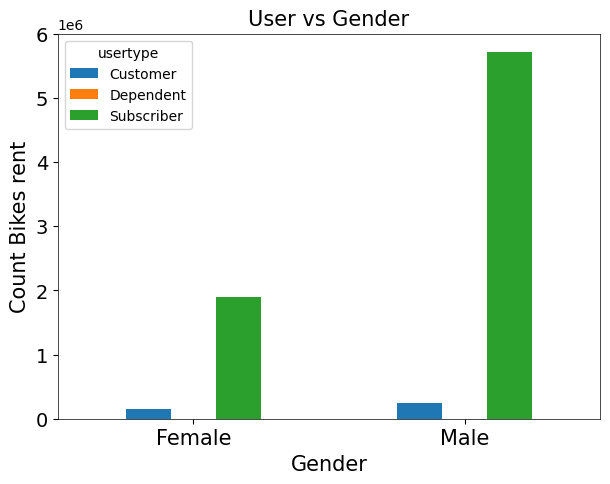

In [31]:
ct=pd.crosstab(df_all.gender,df_all.usertype)
ct.plot(kind='bar',figsize=(7,5))
plt.xticks(rotation=0,fontsize=15)
plt.yticks(fontsize=14)
plt.title("User vs Gender",fontsize=15)
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Count Bikes rent",fontsize=15)
matplotlib.rcParams['axes.linewidth'] = 0

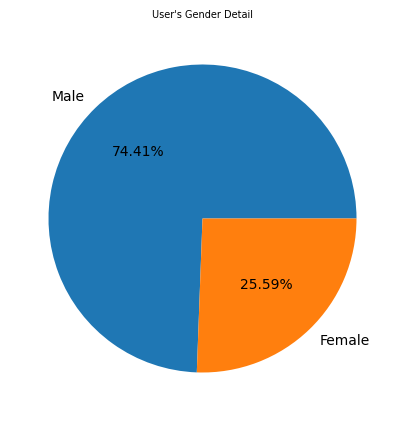

In [32]:
data_by_gender= df_all.gender.value_counts()
plt.figure(figsize= (7,5))
plt.title("User's Gender Detail", fontsize =7)
plt.pie(data_by_gender,labels =data_by_gender.index ,autopct = "%0.2f%%");

In [33]:
df_all['usertype'].value_counts()

Subscriber    7642149
Customer      2112636
Dependent           7
Name: usertype, dtype: int64

In [34]:
Customer_Percentage=(df_all['usertype'].value_counts()/len(df_all['usertype']))*100
print(Customer_Percentage)

Subscriber    67.929610
Customer      18.778820
Dependent      0.000062
Name: usertype, dtype: float64


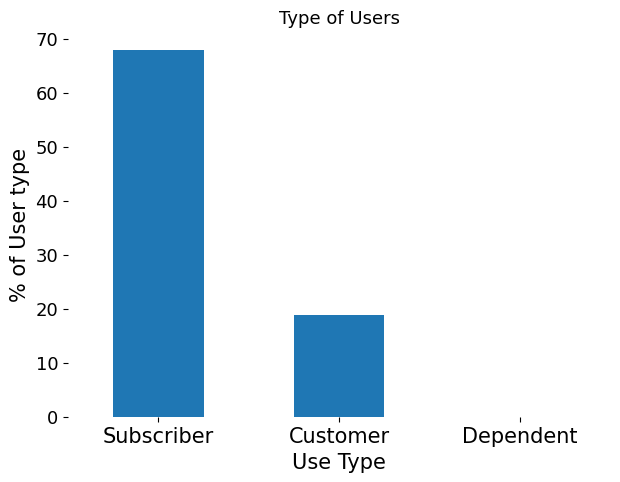

In [35]:
Customer_Percentage.plot(kind='bar',figsize=(7,5))
plt.xticks(rotation=0,fontsize=15)
plt.yticks(fontsize=13)
plt.title("Type of Users",fontsize=13)
plt.ylabel("% of User type",fontsize=15)
plt.xlabel("Use Type",fontsize=15)
matplotlib.rcParams['axes.linewidth'] = 0.5

In [36]:
df_all[['usertype']].describe(percentiles=[.05, .25, .5, .75, .999])

,usertype
count,9754792
unique,3
top,Subscriber
freq,7642149


RIDE DISTANCE ANALYSIS

In [37]:
df_all['ride_distance'] = np.sqrt( ((df_all['to_station_latitude'] - df_all['from_station_latitude'])**2) + ((df_all['to_station_longitude'] - df_all['from_station_longitude'])**2) )
    # formula for distance between two coordinates:
    # sqrt( (x2-x1)^2 + (y2-y1)^2 )
    # d = √((x2-x1)2 + (y2-y1)2)
df_all['ride_distance'] = df_all['ride_distance'] * 111.139

In [38]:
df_all.dtypes

trip_id                          float64
start_time                datetime64[ns]
end_time                  datetime64[ns]
bikeid                           float64
tripduration                      object
from_station_id                  float64
from_station_name                 object
to_station_id                    float64
to_station_name                   object
usertype                          object
gender                            object
birthyear                        float64
Quarter                         category
from_station_latitude            float64
from_station_longitude           float64
to_station_latitude              float64
to_station_longitude             float64
startdate_time            datetime64[ns]
dayoftheWeek                    category
Month                           category
Year                             float64
StartingTime                      object
season                            object
ride_distance                    float64
dtype: object

In [39]:
df_all[['ride_distance']].describe(percentiles=[.05, .25, .5, .75, .999])

,ride_distance
count,8.889717e+06
mean,2.331959e+00
std,1.865269e+00
min,0.000000e+00
5%,3.938374e-01
25%,1.089124e+00
50%,1.800524e+00
75%,3.022890e+00
99.9%,1.287029e+01
max,3.705622e+01


In [40]:
trip_distance = df_all.groupby(['usertype'])['ride_distance'].mean().sort_values(ascending=False)
trip_distance

usertype
Customer      2.579072
Subscriber    2.261004
Dependent     0.930644
Name: ride_distance, dtype: float64

In [41]:
import plotly.express as px
fig = px.histogram(df_all[:750],x='ride_distance',color = 'gender',title = 'Ride Distance')
fig.show()

In [42]:
print("Minimum ride_length : ", df_all['ride_distance'].min())
print("Maximum ride_length : ", df_all['ride_distance'].max())

Minimum ride_length :  0.0
Maximum ride_length :  37.0562196756729


RIDE DURATION ANALYSIS

In [43]:
df_all['start_time'] = pd.to_datetime(df_all['start_time'])
df_all['end_time'] = pd.to_datetime(df_all['end_time'])

In [44]:
df_all['ride_length'] = (df_all['end_time']-df_all['start_time']).astype('timedelta64[s]')/60

print("Minimum ride_length : ", df_all['ride_length'].min())
print("Maximum ride_length : ", df_all['ride_length'].max())
df_all.info()

Minimum ride_length :  -56.36666666666667
Maximum ride_length :  224220.33333333334
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250100 entries, 0 to 11250099
Data columns (total 25 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   trip_id                 float64       
 1   start_time              datetime64[ns]
 2   end_time                datetime64[ns]
 3   bikeid                  float64       
 4   tripduration            object        
 5   from_station_id         float64       
 6   from_station_name       object        
 7   to_station_id           float64       
 8   to_station_name         object        
 9   usertype                object        
 10  gender                  object        
 11  birthyear               float64       
 12  Quarter                 category      
 13  from_station_latitude   float64       
 14  from_station_longitude  float64       
 15  to_station_latitude     float64       
 16  to_s

In [45]:
df_all.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,...,to_station_latitude,to_station_longitude,startdate_time,dayoftheWeek,Month,Year,StartingTime,season,ride_distance,ride_length
0,13518905.0,2017-03-31 23:59:07,2017-04-01 00:13:24,5292.0,857,66.0,Clinton St & Lake St,171.0,May St & Cullerton St,Subscriber,...,41.855136,-87.654127,2017-03-31 23:59:07,Friday,March,2017.0,23:59:07,Spring,3.655273,14.283333
1,13518904.0,2017-03-31 23:56:25,2017-04-01 00:00:21,4408.0,236,199.0,Wabash Ave & Grand Ave,26.0,McClurg Ct & Illinois St,Subscriber,...,41.891020,-87.617300,2017-03-31 23:56:25,Friday,March,2017.0,23:56:25,Spring,1.056333,3.933333
2,13518903.0,2017-03-31 23:55:33,2017-04-01 00:01:21,696.0,348,520.0,Greenview Ave & Jarvis Ave,432.0,Clark St & Lunt Ave,Subscriber,...,42.009074,-87.674190,2017-03-31 23:55:33,Friday,March,2017.0,23:55:33,Spring,0.988006,5.800000
3,13518902.0,2017-03-31 23:54:46,2017-03-31 23:59:34,4915.0,288,110.0,Dearborn St & Erie St,142.0,McClurg Ct & Erie St,Subscriber,...,41.894503,-87.617854,2017-03-31 23:54:46,Friday,March,2017.0,23:54:46,Spring,1.275363,4.800000
4,13518901.0,2017-03-31 23:53:33,2017-04-01 00:00:28,4247.0,415,327.0,Sheffield Ave & Webster Ave,331.0,Halsted St & Blackhawk St (*),Subscriber,...,41.908537,-87.648627,2017-03-31 23:53:33,Friday,March,2017.0,23:53:33,Spring,1.556043,6.916667


In [46]:
import plotly.express as px
fig = px.histogram(df_all[:750],x='ride_length',color = 'gender',title = 'Ride Duration')
fig.show()

In [47]:
print(df_all['ride_length'].max())

224220.33333333334


which is same as 62.283425925925926 hours

In [48]:
print(df_all['ride_length'].min())

-56.36666666666667


In [49]:
df_all[['ride_length']].describe(percentiles=[.05, .25, .5, .75, .999])

,ride_length
count,9.754792e+06
mean,2.121448e+01
std,4.398381e+02
min,-5.636667e+01
5%,3.333333e+00
25%,6.766667e+00
50%,1.155000e+01
75%,2.013333e+01
99.9%,4.563368e+02
max,2.242203e+05


SEASON VS RIDE LENGTH

In [50]:
trip_duration = df_all.groupby(['season'])['ride_length'].mean().sort_values(ascending=False)
trip_duration

season
Summer    24.838055
Autumn    19.288869
Spring    18.709618
Winter    14.509616
Name: ride_length, dtype: float64

ANALYSIS ON BASIS OF AGE

In [51]:
df_all.dropna(subset=['birthyear'], inplace=True)

In [52]:
df_all['member_age'] = (2023-df_all['birthyear']).astype(int)
df_all[['member_age']].describe(percentiles=[.05, .25, .5, .75, .999])

,member_age
count,8.027349e+06
mean,4.020663e+01
std,1.092894e+01
min,6.000000e+00
5%,2.800000e+01
25%,3.200000e+01
50%,3.700000e+01
75%,4.600000e+01
99.9%,7.900000e+01
max,1.350000e+02


In [53]:
minimum = df_all['member_age'].min()
maxium = df_all['member_age'].max()
bins = [minimum, 16, 25, 30, 35, 40, 50, 60, 75, 85, maxium ]
labels = ["0-16", "16-25", "25-30", "30-35", "35-40", "40-50", "50-60", "60-75", "75-85","85-120"]

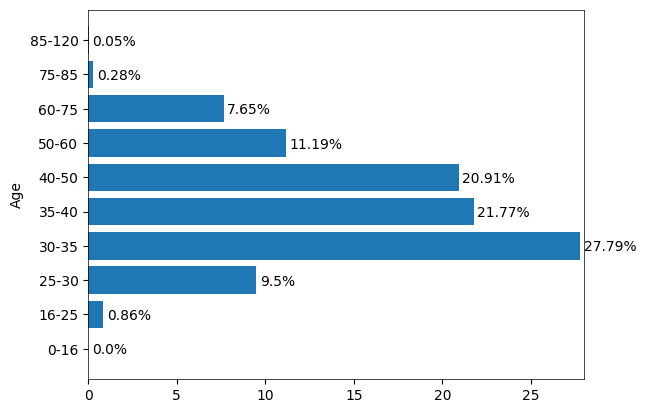

In [54]:
df_all['age_group'] = pd.cut(df_all['member_age'], bins=bins, right=False, labels=labels)
plot_df8 = pd.DataFrame(round(df_all['age_group'].value_counts(normalize=True)*100,2))
plot_df8 = plot_df8.reset_index()
plot_df8.columns = ['age_group', 'percentage']
age_group_dtype = pd.api.types.CategoricalDtype(categories=labels, ordered=True)
plot_df8['age_group'] = plot_df8['age_group'].astype(age_group_dtype)
plot_df8 = plot_df8.sort_values('age_group')
plt.barh(data=plot_df8, y=range(plot_df8.shape[0]), tick_label='age_group', width='percentage')
for i,v in enumerate(plot_df8['percentage'].values):
    plt.text(v+.2,i-.15,str(v)+'%')
plt.xlim(0,28)
plt.ylabel('Age')
plt.show()

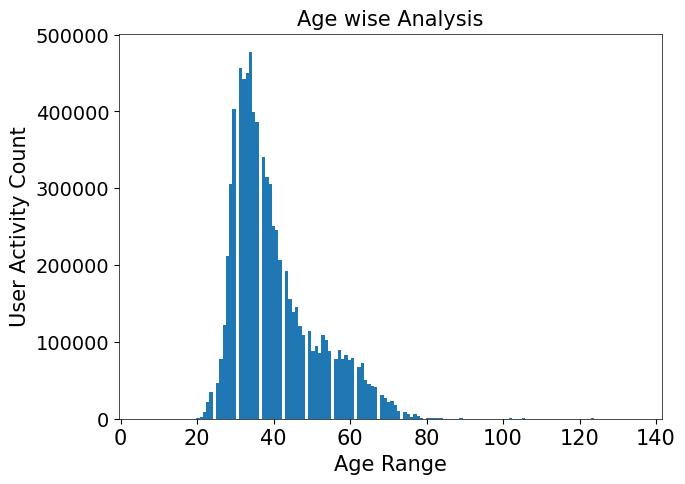

In [55]:
plt.figure(figsize=(7,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=14)
plt.title("Age wise Analysis",fontsize=15)
plt.ylabel("User Activity Count",fontsize=15)
plt.xlabel("Age Range",fontsize=15)
plt.hist(df_all['member_age'],bins=150)
matplotlib.rcParams['axes.linewidth'] = 0

RIDE-LENGTH VS GENDER

In [56]:
fig = px.histogram(df_all[:500],x='ride_length',color = 'gender',title = ' Most frequent trip duration')
fig.show()

In [57]:
trip_duration = df_all.groupby(['gender'])['ride_length'].mean().sort_values(ascending=False)
trip_duration

gender
Female    18.091659
Male      14.264946
Name: ride_length, dtype: float64

In [58]:
bikes = df_all.groupby(['bikeid']).count()['trip_id'].sort_values(ascending=False)

POPULAR AND DESERTED STATIONS

In [59]:
From_to_Desitnations=pd.Series(df_all.to_station_id.values,index=df_all.from_station_id)
From_to_Desitnations=tuple(zip(From_to_Desitnations,From_to_Desitnations.index))


In [60]:
from collections import Counter
most_common_destinations= [word for word, word_count in Counter(From_to_Desitnations).most_common(10)]
most_comman_from_Id=[word_count for word_count in Counter(df_all.from_station_id).most_common(10)]
most_comman_from_Id2=[]
for i in most_comman_from_Id:
    most_comman_from_Id2.append(i[0])

In [61]:
dff=df_all[df_all['from_station_id'].isin(most_comman_from_Id2)]
ddf=df_all[df_all['from_station_id'].isin(most_comman_from_Id2)]

In [62]:
fromStations=[word_count for word_count in Counter(ddf.from_station_name).most_common(10)]
fromStationName=[]
fromStationCount=[]
for i in fromStations:
    fromStationName.append(i[0])
    fromStationCount.append(i[1])

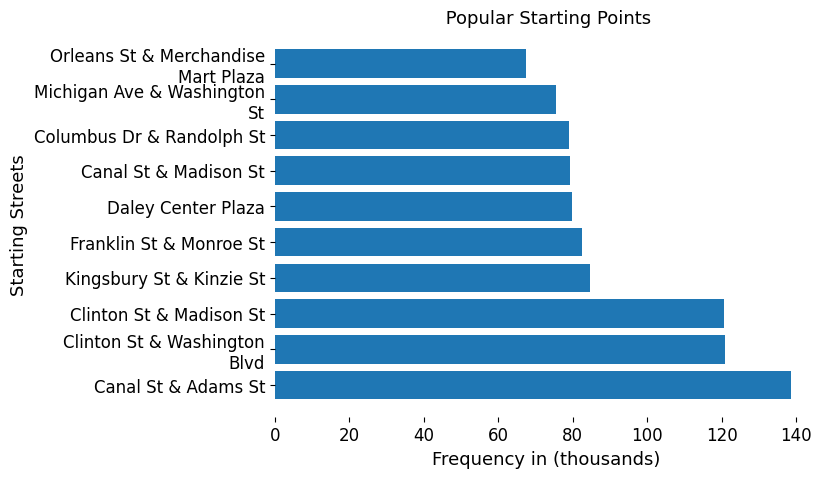

In [63]:
from textwrap import wrap
fromStationName = [ '\n'.join(wrap(l, 25)) for l in fromStationName ]
fig = plt.figure(figsize=(7,5))
plt.barh(fromStationName,[i/1000 for i in fromStationCount])
plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Starting Streets',fontsize=13)
plt.xlabel('Frequency in (thousands)',fontsize=13)
plt.title(' Popular Starting Points',fontsize=13)
matplotlib.rcParams['axes.linewidth'] = 1.0

POPULAR ENDING POINTS

In [64]:
most_comman_to_Id=[word_count for word_count in Counter(df_all.to_station_id).most_common(10)]
most_comman_to_Id2=[]
for i in most_comman_to_Id:
    most_comman_to_Id2.append(i[0])
dfe=df_all[df_all['to_station_id'].isin(most_comman_to_Id2)]

In [65]:
ToStations=[word_count for word_count in Counter(dfe.to_station_name).most_common(10)]
ToStationName=[]
ToStationCount=[]
for i in ToStations:
    ToStationName.append(i[0])
    ToStationCount.append(i[1])

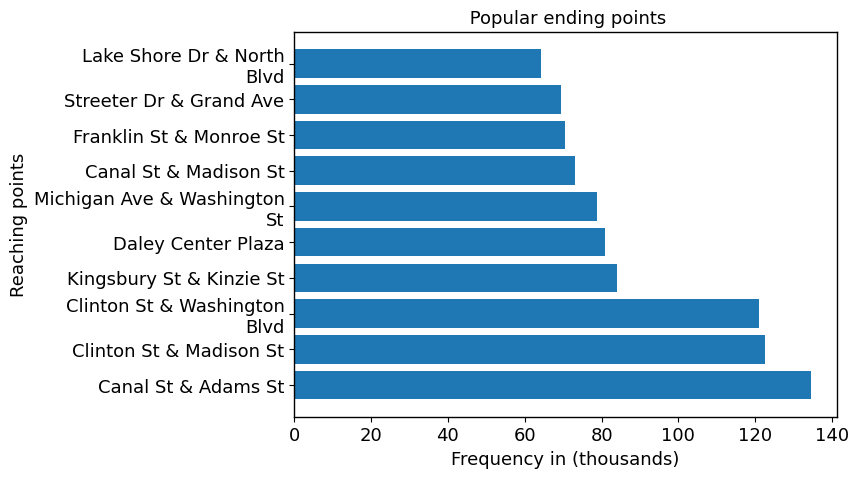

In [66]:
ToStationName = [ '\n'.join(wrap(l, 25)) for l in ToStationName ]
fig = plt.figure(figsize=(7,5))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.barh(ToStationName,[i/1000 for i in ToStationCount])
plt.ylabel('Reaching points',fontsize=13)
plt.title(' Popular ending points',fontsize=13)
plt.xlabel('Frequency in (thousands)',fontsize=13)
matplotlib.rcParams['axes.linewidth'] = 0.5


POPULAR ROUTES

In [67]:
dfm=df_all.loc[(df_all.from_station_id.isin(most_comman_from_Id2)) & (df_all.to_station_id.isin(most_comman_to_Id2))]
dfm['from_to_destinations']=dff['from_station_name'] + ' To ' + dff['to_station_name']

<ipython-input-67-150905ec2f9b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



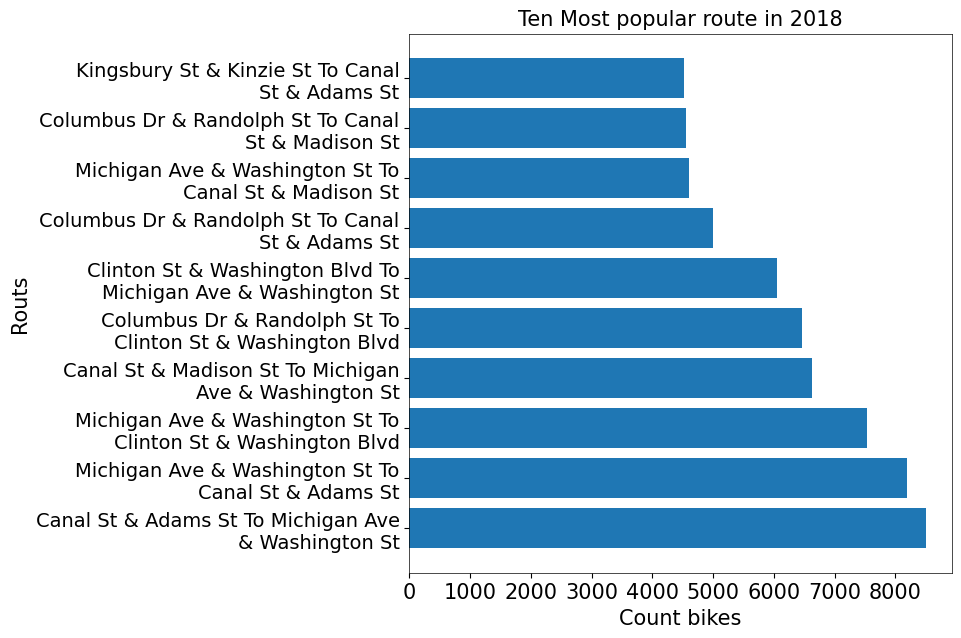

In [68]:
ToStations=[word_count for word_count in Counter(dfm.from_to_destinations).most_common(10)]
popular_route=dfm['from_to_destinations'].value_counts()

routeName=[]
routeCount=[]
for i in ToStations:
    routeName.append(i[0])
    routeCount.append(i[1])
routeName = [ '\n'.join(wrap(l, 35)) for l in routeName ]
plt.figure(figsize=(7,7))
#plt.xlim(min(popular_route)-10000,max(popular_route)+10000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=14)
plt.title("Ten Most popular route in 2018",fontsize=15)
plt.xlabel("Count bikes",fontsize=15)
plt.ylabel("Routs",fontsize=15)
plt.barh(routeName,routeCount)
matplotlib.rcParams['axes.linewidth'] = 0.5